## Урок 4

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np

In [2]:
def ruletka(m):
    # m - количество испытаний
    res =[]
    for i in range(m):
        x = int(np.random.uniform(0,37)) 
        res.append(x)
    return res

print(ruletka(10))

[33, 10, 30, 23, 5, 28, 10, 11, 5, 11]


### 2. 
#### 1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [3]:
def monetka(m):
    # m - количество испытаний
    res =[]
    for i in range(m):
        x = int(np.random.uniform(0,2)) 
        res.append(x)
    return res

In [4]:
# 9 бросков монеты
# A: 0 <= орел < 3 ,  B: 3 <= орел < 10 - несовместные (противоположные) события
# Проверяем, что PA + PB ~=~ 1

In [5]:
m = 1000
a = sum([1 if 0 <= sum(monetka(9)) < 3 else 0 for _ in range(m)])
b = sum([1 if 3 <= sum(monetka(9)) < 10 else 0 for _ in range(m)])
d = (a + b) / m - 1 # отклонение
a, b, d

(87, 902, -0.01100000000000001)

In [6]:
m = 10000
a = sum([1 if 0 <= sum(monetka(9)) < 3 else 0 for _ in range(m)])
b = sum([1 if 3 <= sum(monetka(9)) < 10 else 0 for _ in range(m)])
d = (a + b) / m - 1
a, b, d

(892, 9106, -0.00019999999999997797)

#### 2) Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [7]:
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
a = [sum(np.random.rand(10)) for _ in range(1000)] 
# позволил себе увеличить параметр количество выборок до 1000

Text(0.5, 1.0, 'Гистограмма')

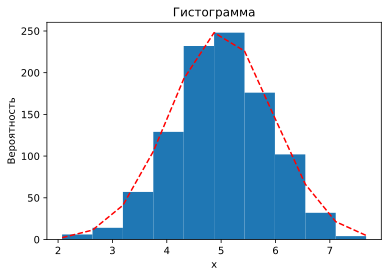

In [9]:
num_bins = 10
n, bins, patches = plt.hist(a, num_bins)
y = norm.pdf(bins, 5, 0.95)
y *= max(n)/max(y)
plt.plot(bins, y, 'r--')
plt.xlabel('x')
plt.ylabel('Вероятность')
plt.title('Гистограмма')


In [10]:
n

array([  6.,  14.,  57., 129., 232., 248., 176., 102.,  32.,   4.])

## 3.
#### 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [11]:
import itertools

In [12]:
def bernulli(n, k, n_samples):
    # n_samples - количество бросков в одном испытании
    # n - количество испытаний
    # k - количество успехов за n испытаний
    a = []
    for ind in range(n):
        a.append(np.random.randint(0, 2, n_samples))
    a = sum(a)
    x = len(list(filter(lambda x: x == k, a)))
    return x/n_samples


In [13]:
bernulli(5, 2, 10000)

0.3108

In [14]:
n = 5
k = 2 
nstr = ''.join(map(str, range(n))) # строчка из n элементов для комбинирования
C52 = len(list(itertools.combinations(nstr, k)))/2**n
C52

0.3125

#### 2) Повторите расчеты, взяв другие значения n и k.

In [15]:
bernulli(7, 5, 10**6)

0.164389

In [16]:
n = 7
k = 5
nstr = ''.join(map(str, range(n))) # строчка из n элементов для комбинирования
C75 = len(list(itertools.combinations(nstr, k)))/2**n
C75

0.1640625

## 4. Повторите расчеты itertools, взяв другие значения n и k.

In [17]:
n = 4
nstr = ''.join(map(str, range(n)))

In [18]:
list(map(''.join, itertools.product(nstr,repeat=2)))

['00',
 '01',
 '02',
 '03',
 '10',
 '11',
 '12',
 '13',
 '20',
 '21',
 '22',
 '23',
 '30',
 '31',
 '32',
 '33']

In [19]:
list(map(''.join, itertools.permutations(nstr)))

['0123',
 '0132',
 '0213',
 '0231',
 '0312',
 '0321',
 '1023',
 '1032',
 '1203',
 '1230',
 '1302',
 '1320',
 '2013',
 '2031',
 '2103',
 '2130',
 '2301',
 '2310',
 '3012',
 '3021',
 '3102',
 '3120',
 '3201',
 '3210']

In [20]:
list(map(''.join, itertools.combinations(nstr, 2)))

['01', '02', '03', '12', '13', '23']

## 5. Дополните код расчетом коэффициента корреляции x и y по формуле

0.6932640576232679 0.1429262071291052


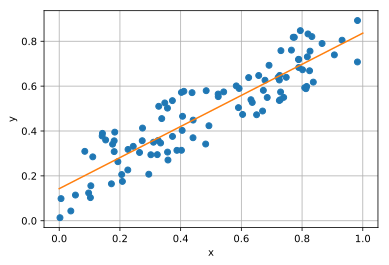

In [21]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n
print(a, b)

plt.plot([0, 1], [b, a + b])
plt.show()

In [22]:
# Расчет коэффициента корреляции
xm = sum(x)/n
ym = sum(y)/n
r = (x - xm) @ (y - ym)/np.sqrt((x - xm) @ (x - xm) * (y - ym) @ (y - ym))
print(f'Коэффициент корреляции: {r}')

# Проверка
np.corrcoef(x, y)

Коэффициент корреляции: 0.903658264510709


array([[1.        , 0.90365826],
       [0.90365826, 1.        ]])

## Доп. задача про иглу Бюффона. 

In [23]:
## задача решена аналитически на листочке (см. игла Бюффона.jpg)
## для проверки используется численное решение при помощи функции buffon(a, b)
## графики ниже показывают близкие результаты по обоим способам

In [24]:
# функция для проверки численным методом
def buffon(a, b):
    def intersected(y_, fi_):
        return 1 if (int((y_ + b*np.sin(fi_))/a) - int(y_/a) > 0) else 0
    
    itr = 120
    y = np.linspace(0, 1, itr)
    fi = np.linspace(0, np.pi/2, itr)
    yv, fiv = np.meshgrid(y, fi)
    return sum([intersected(yv[i, j], fiv[i, j]) for i in range(itr) for j in range(itr)])/itr/itr

In [25]:
# вероятность при a = b
2/np.pi

0.6366197723675814

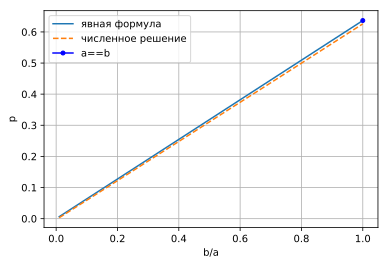

In [26]:
# вероятность при a > b
n_points = 10
x = np.linspace(0.01, 1, n_points)
y = 2/np.pi*x                             # аналитическое решение
y1 = [buffon(1, x[i]) for i in range(n_points)] # численное решение
plt.xlabel('b/a')
plt.ylabel('p')
plt.grid(True)

plt.plot(x, y)
plt.plot(x, y1, '--')
plt.plot([1], [2/np.pi], fillstyle='full', marker='o', markersize=4, color='blue')
plt.legend(('явная формула','численное решение', 'a==b'))
plt.show()

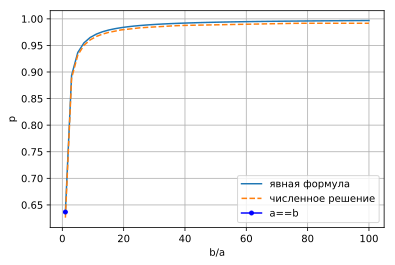

In [27]:
# вероятность при a < b
n_points = 50
x = np.linspace(1, 100, n_points)
y = 1 + 2/np.pi*(x - np.arcsin(1/x) - np.sqrt(x**2 - 1)) # аналитическое решение
y1 = [buffon(1, x[i]) for i in range(n_points)]                # численное решение
plt.xlabel('b/a')
plt.ylabel('p')
plt.grid(True)

plt.plot(x, y)
plt.plot(x, y1, '--')
#plt.vlines(1, 0.6, y.max(), linestyle = ':')

plt.plot([1], [2/np.pi], fillstyle='full', marker='o', markersize=4, color='blue')
plt.legend(('явная формула','численное решение', 'a==b'))

plt.show()

## Размышления по задаче 4 про купюры 50, 100, 200 (не решена)

In [74]:
def game4_old(rpt):
    probas = []
    combs = list(itertools.product('псд',repeat=rpt))
    for c in combs:
        a = [0]*rpt
        p, s, d = 1, 1, 1
        for i in range(rpt):
            if c[i] == 'п':
                a[i] = p / (p + s + d)
                p += 1
            elif c[i] == 'с':
                a[i] = s / (p + s + d)
                s += 1
            elif c[i] == 'д':
                a[i] = d / (p + s + d)
                d += 1
        probas.append(a)
        [reduce(lambda x, y: x*y, pr) for pr in probas]
            
    return probas

In [85]:
def game4(rpt):
    # вычисляет вероятности всех цепочек выборов длины rpt
    probas = []
    combs = list(itertools.product('псд',repeat=rpt)) # п - пятьдесят    с - сто    д - двести
    for c in combs:
        a = 1
        p, s, d = 1, 1, 1
        for i in range(rpt):
            if c[i] == 'п':
                a *= p / (p + s + d)
                p += 1
            elif c[i] == 'с':
                a *= s / (p + s + d)
                s += 1
            elif c[i] == 'д':
                a *= d / (p + s + d)
                d += 1
        probas.append([c[rpt-1], a])
           
    return probas

In [102]:
probas = game4(1)
p50 = sum(list(zip(*list(filter(lambda x: x[0] == 'п', probas))))[1])
p100 = sum(list(zip(*list(filter(lambda x: x[0] == 'с', probas))))[1])
p200 = sum(list(zip(*list(filter(lambda x: x[0] == 'д', probas))))[1])
p50, p100, p200

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333)

(0.333333333333333, 0.3333333333333331, 0.3333333333333333)

In [99]:
probas = game4(6)
p50 = sum(list(zip(*list(filter(lambda x: x[0] == 'п', probas))))[1])
p100 = sum(list(zip(*list(filter(lambda x: x[0] == 'с', probas))))[1])
p200 = sum(list(zip(*list(filter(lambda x: x[0] == 'д', probas))))[1])
p50, p100, p200

(0.33333333333333265, 0.33333333333333276, 0.33333333333333265)

In [103]:
probas = game4(8)
p50 = sum(list(zip(*list(filter(lambda x: x[0] == 'п', probas))))[1])
p100 = sum(list(zip(*list(filter(lambda x: x[0] == 'с', probas))))[1])
p200 = sum(list(zip(*list(filter(lambda x: x[0] == 'д', probas))))[1])
p50, p100, p200

(0.3333333333333279, 0.33333333333333137, 0.3333333333333292)

### вероятность выбора купюры каждого номинала на каждом цикле - равная, 1/3. Похоже нет разницы, кто в каком порядке выбирает.